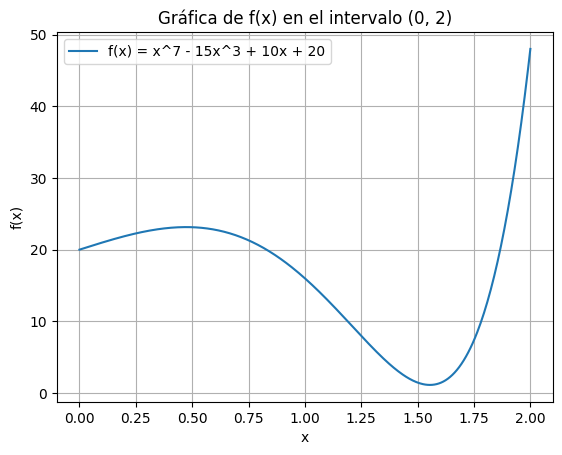

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función
def f(x):
    return x**7 - 15*x**3 + 10*x + 20

# Definir el intervalo
x = np.linspace(0, 2, 400)
# x = np.linspace(-20, 20, 400)

# Calcular los valores de la función
y = f(x)

# Crear la gráfica
plt.plot(x, y, label='f(x) = x^7 - 15x^3 + 10x + 20')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo (0, 2)')
plt.legend()
plt.grid(True)
plt.show()


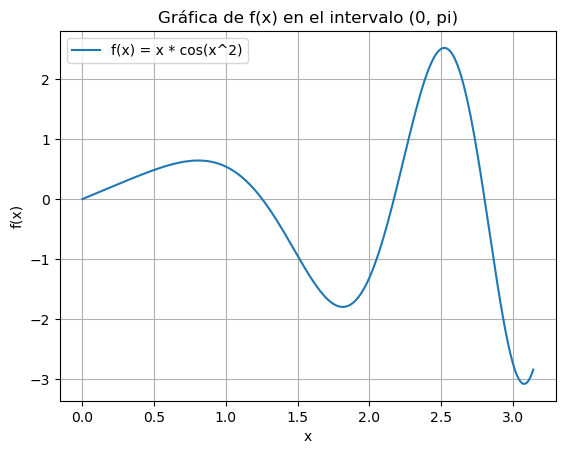

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f_a(x):
    return x * np.cos(x**2)

# Intervalo de valores de x
x_values = np.linspace(0, np.pi, 400)

# Valores correspondientes de f_a(x)
y_values = f_a(x_values)

# Crear la gráfica
plt.plot(x_values, y_values, label='f(x) = x * cos(x^2)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo (0, pi)')
plt.legend()
plt.grid(True)
plt.show()


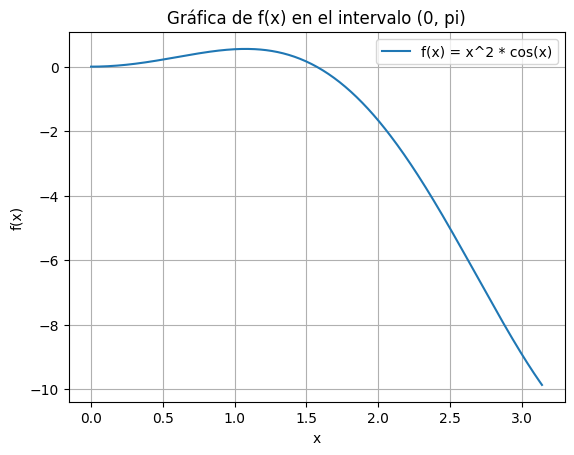

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def f_b(x):
    return x**2 * np.cos(x)

# Intervalo de valores de x
x_values = np.linspace(0, np.pi, 400)

# Valores correspondientes de f_b(x)
y_values = f_b(x_values)

# Crear la gráfica
plt.plot(x_values, y_values, label='f(x) = x^2 * cos(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfica de f(x) en el intervalo (0, pi)')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import numpy as np

def f_a(x):
    return x * np.cos(x**2)

def f_b(x):
    return x**2 * np.cos(x)

def simpson_composite(f, a, b, n):
    """Regla compuesta de Simpson para aproximar una integral definida.

    Args:
        f (function): La función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subdivisiones del intervalo.

    Returns:
        float: Aproximación de la integral definida.
    """
    if n % 2 != 0:
        raise ValueError("El número de subdivisiones debe ser par.")

    h = (b - a) / n
    suma = f(a) + f(b)

    for i in range(1, n):
        if i % 2 == 0:
            suma += 2 * f(a + i * h)
        else:
            suma += 4 * f(a + i * h)

    return (h / 3) * suma

# def simpson_composite(f, a, b, n):
resultado_a = abs(simpson_composite(f_a, 0, np.pi, 10))
print("Aproximación de la integral de f_a(x):", resultado_a)

resultado_b = abs(simpson_composite(f_b, 0, np.pi, 10))
print("Aproximación de la integral de f_b(x):", resultado_b)




Aproximación de la integral de f_a(x): 0.1995523571843806
Aproximación de la integral de f_b(x): 6.282144972463121


In [5]:
import numpy as np

def f_a(x):
    return x * np.cos(x**2)

def f_b(x):
    return x**2 * np.cos(x)

def simpson_composite(f, a, b, n):
    """Regla compuesta de Simpson para aproximar una integral definida.

    Args:
        f (function): La función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        n (int): Número de subdivisiones del intervalo.

    Returns:
        float: Aproximación de la integral definida.
    """
    if n % 2 != 0:
        raise ValueError("El número de subdivisiones debe ser par.")

    h = (b - a) / n
    suma = f(a) + f(b)

    for i in range(1, n):
        if i % 2 == 0:
            suma += 2 * f(a + i * h)
        else:
            suma += 4 * f(a + i * h)

    return (h / 3) * suma

def estimar_integral_con_precision(f, a, b, precision=1e-6):
    """Estima la integral de una función en un intervalo hasta alcanzar la precisión deseada.

    Args:
        f (function): La función a integrar.
        a (float): Límite inferior del intervalo.
        b (float): Límite superior del intervalo.
        precision (float): Precisión deseada.

    Returns:
        tuple: Aproximación de la integral y el número de puntos requeridos.
    """
    n_anterior = None
    resultado_anterior = None
    for n in range(2, 100000, 2):  # Aumentando de 2 en 2
        resultado = simpson_composite(f, a, b, n)
        if n_anterior is not None and abs(resultado - resultado_anterior) < precision:
            return resultado, n
        resultado_anterior = resultado
        n_anterior = n

# Estimar la integral para f_a(x)
resultado_a, puntos_a = estimar_integral_con_precision(f_a, 0, np.pi)
print("a) Aproximación de la integral de f_a(x):", resultado_a)
print("   Número de puntos requeridos:", puntos_a)

# Estimar la integral para f_b(x)
resultado_b, puntos_b = estimar_integral_con_precision(f_b, 0, np.pi)
print("b) Aproximación de la integral de f_b(x):", resultado_b)
print("   Número de puntos requeridos:", puntos_b)


a) Aproximación de la integral de f_a(x): -0.21515695226150966
   Número de puntos requeridos: 56
b) Aproximación de la integral de f_b(x): -6.28318131766702
   Número de puntos requeridos: 40
